In [1]:
# needed for ImageSimulator
import tensorflow as tf
import forward_model_tf as fm
import matplotlib.pyplot as plt
import imageio
import numpy as np
import cv2

# needed to load our images
import utils as ut
import glob
import os

# my simulator class
from simulator import ImageSimulator

# for a bit of investigation into the process surrounding the SVD
#import pdb
from IPython.core.debugger import set_trace

2022-10-20 17:08:17.648006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-20 17:08:17.761148: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-20 17:08:18.809921: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/dshteinbok/miniconda3/lib/:/home/dshteinbok/miniconda3/envs/tf/lib/
2022-10-20 17:08:18.809982: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_pl

# Simulated Images
Generate a few simulated images from the given target data (from Waller's Google Drive) and compare them to the simulated images from the same Google Drive.

Later, I'll use the same function in this notebook to generate a whole bunch of images from the SVD of the PSFs for nVue (from Zemax).

In [2]:
# instantiate a simulator
miniscopeSimulator = ImageSimulator('../data/SVD_2_5um_PSF_5um_1_ds4_dsz1_comps_green_SubAvg.mat',
                                      '../data/SVD_2_5um_PSF_5um_1_ds4_dsz1_weights_green_SubAvg.mat', input_4d=True)

In [3]:
# Load the paths to three images
target_dir = '/home/dshteinbok/TrainingData/Ground_truth_downsampled/'
target_path = sorted(glob.glob(target_dir + '*'))[:3]

input_dir = '/home/dshteinbok/TrainingData/Simulated_Miniscope_2D_Training_data/' 
input_path = sorted(glob.glob(input_dir + '*'))[:3]

print(target_path)
print(input_path)

['/home/dshteinbok/TrainingData/Ground_truth_downsampled/0.png', '/home/dshteinbok/TrainingData/Ground_truth_downsampled/1.png', '/home/dshteinbok/TrainingData/Ground_truth_downsampled/10.png']
['/home/dshteinbok/TrainingData/Simulated_Miniscope_2D_Training_data/0.png', '/home/dshteinbok/TrainingData/Simulated_Miniscope_2D_Training_data/1.png', '/home/dshteinbok/TrainingData/Simulated_Miniscope_2D_Training_data/10.png']


In [4]:
# make a single 2D array... zip target with Waller's sims
path_pairs = zip(target_path, input_path)

In [5]:
# simulate each of the three images
image_triplets = []
for path_pair in path_pairs:
    obj, sim = miniscopeSimulator.simulate(path_pair[0])
    im_in=imageio.v2.imread(path_pair[1])
    #im_in=np.sum(im_in,-1)/3
    sim_Laura=cv2.resize(im_in,(648,486))
    # Read an image from a file
#     input_string = tf.io.read_file(path_pair[1])
#     # Decode it into a dense vector
#     input_decoded = tf.cast(tf.image.decode_png(input_string, channels=1), tf.float32)
    # Resize it to fixed shape
    # input_resized = tf.image.resize(input_decoded, [img_height, img_width])
    #sim_Laura = input_decoded / 255.0
    image_triplets.append((obj, sim_Laura, sim))

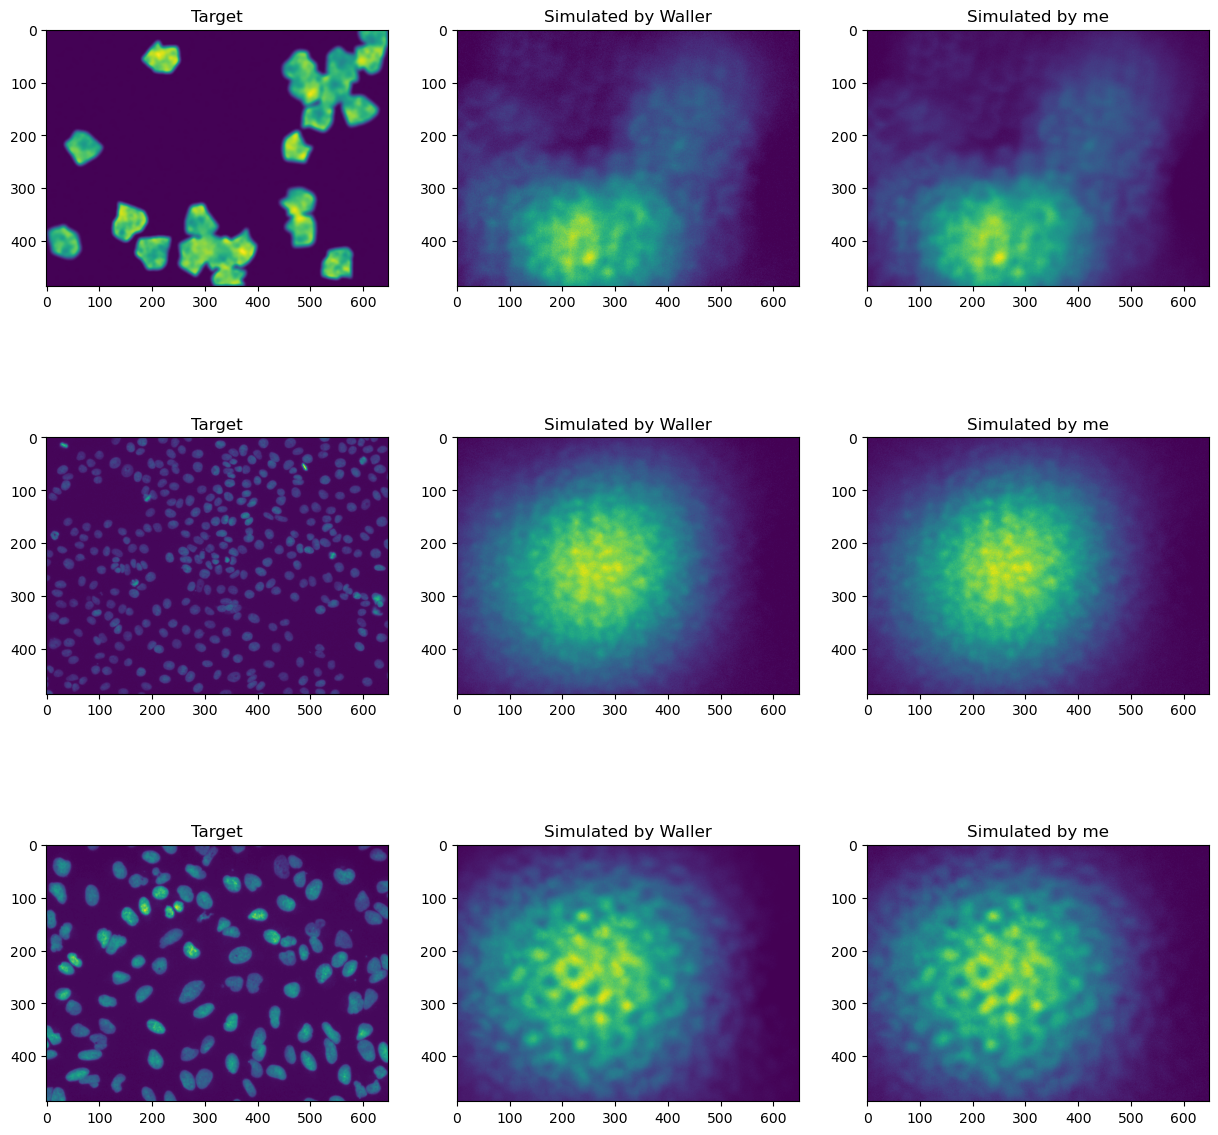

In [6]:
# Draw the set of images
image_titles = ['Target', 'Simulated by Waller', 'Simulated by me']
fig, axs = plt.subplots(3, 3, figsize=(15,15))
for row in range(len(image_triplets)):
    for column in range(3):
        axs[row, column].imshow(image_triplets[row][column])
        axs[row, column].set_title(image_titles[column])

In [7]:
type(image_triplets[0][1])

numpy.ndarray

image has 3 channels. Converting to grayscale.


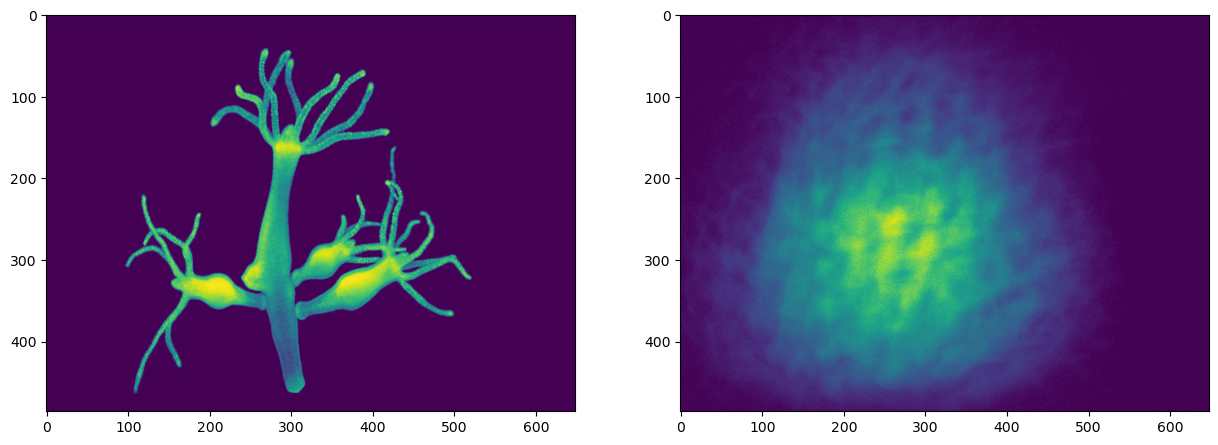

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,15))

img, sim = miniscopeSimulator.simulate('../data/hydra3.jpg')
ax[0].imshow(img)
ax[1].imshow(sim)

In [9]:
from simulator import *

In [10]:
# sim_from_pathlist('../data/nV3_h.mat',
#                                       '../data/nV3_weights.mat',
#                  target_path, "../../SimDump/")

In [11]:
# import pdb
# pdb.pm()

In [12]:
# plt.imshow(imageio.v2.imread("../../SimDump/0.png"))

Above is a proof-of-concept that `sim_from_pathlist` works with the SVD of the matrix of PSFs from nV3. Now, it's time to run through the entire directory and simulate them all.

In [13]:
# # target_path_whole = sorted(glob.glob(target_dir + '*'))

# # sim_from_pathlist('../data/nV3_h.mat',
# #                                       '../data/nV3_weights.mat',
# #                  target_path_whole, "../data/nV3_simulated/", output_dir_resized="../data/nV3_resized")
# sim_from_pathlist('../data/nV3_h.mat',
#                                       '../data/nV3_weights.mat',
#                  target_path, "../data/nV3_simulated/", output_dir_resized="../data/nV3_resized")

In [14]:
# plt.imshow(imageio.imread("../data/nV3_simulated/10.png"))

In [15]:
# plt.imshow(imageio.imread("../data/nV3_resized/10.png"))

--Return--
None
> /tmp/ipykernel_4091270/2999296845.py(1)<cell line: 1>()
----> 1 set_trace()
      2 nV3_simulator = ImageSimulator('../data/nV3_h.mat',
      3                                        '../data/nV3_weights.mat')
      4 orig, sim = nV3_simulator.simulate('../data/hydra3.jpg')
      5 fig, axs = plt.subplots(1,2, figsize=(15,15))

ipdb> c
image has 3 channels. Converting to grayscale.


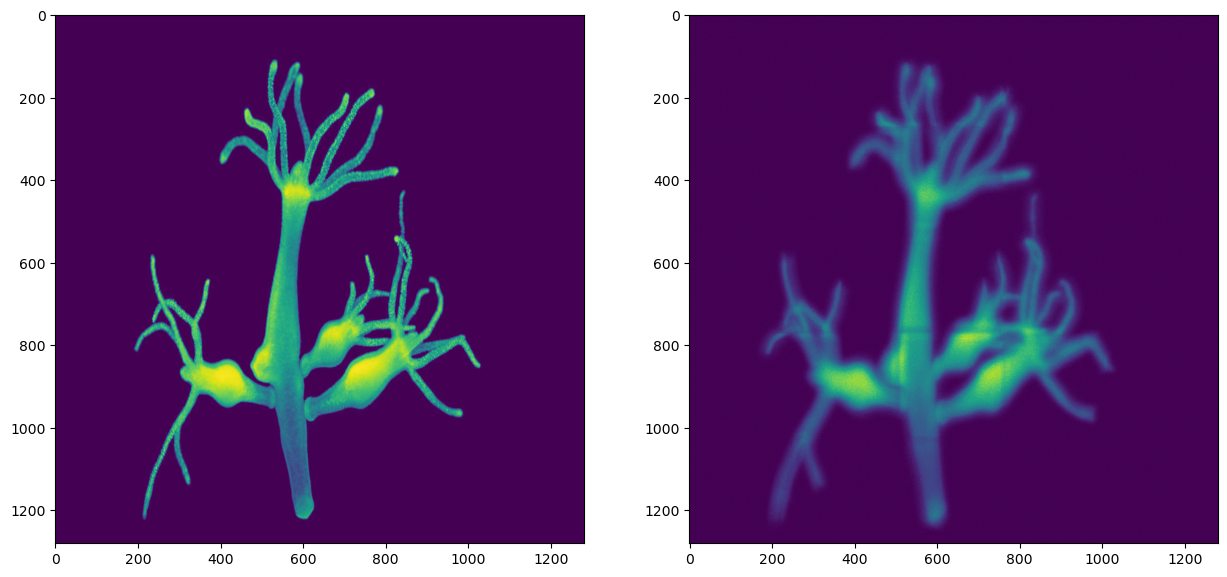

In [16]:
set_trace()
nV3_simulator = ImageSimulator('../data/nV3_h.mat',
                                       '../data/nV3_weights.mat')
orig, sim = nV3_simulator.simulate('../data/hydra3.jpg')
fig, axs = plt.subplots(1,2, figsize=(15,15))
axs[0].imshow(orig)
axs[1].imshow(sim)

In [17]:
# im = np.ones((1280, 1280))
# plt.imshow(fm.sim_data(im,nV3_simulator.H,nV3_simulator.weights,nV3_simulator.crop_indices))

In [ ]:
# simulate two dots
two_dots = np.zeros((1280,1280))
two_dots[1000,1000] = 1
two_dots[1002,1010] = 1
two_dots[640,640] = 1
two_dots[642,640] = 1

set_trace()
two_dots_sim = fm.sim_data(two_dots,nV3_simulator.H,nV3_simulator.weights,nV3_simulator.crop_indices, add_noise=False, a_svd_func=fm.my_A_2d_svd)

# fig, axs = plt.subplots(1, 2, figsize=(15,15))
# axs[0].imshow(two_dots_sim[1190:1210,1190:1210])
# axs[1].imshow(two_dots_sim[630:650,630:650])


--Return--
None
> /tmp/ipykernel_4091270/3036956618.py(8)<cell line: 8>()
      6 two_dots[642,640] = 1
      7 
----> 8 set_trace()
      9 two_dots_sim = fm.sim_data(two_dots,nV3_simulator.H,nV3_simulator.weights,nV3_simulator.crop_indices, add_noise=False, a_svd_func=fm.my_A_2d_svd)
     10 



In [ ]:
nV3_simulator.crop_indices

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(two_dots[920:1080,920:1080])
axs[1].imshow(two_dots_sim[920:1080,920:1080])

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(two_dots[560:720,560:720])
axs[1].imshow(two_dots_sim[560:720,560:720])

In [ ]:
plt.imshow(two_dots_sim)

There exists `scipy.signal.convolve2d`, which will actually convolve two 2D signals (images). Perhaps I can check against that. In general, it seems like Waller et al could have used this instead. It is possible to convolve by quadrants as before, and that should yield exactly the same result (but perhaps faster than what they do)

In [ ]:
# simple convolution
# from scipy import signal
# scipy_convd = scipy.signal.convolve2d(two_dots*nV3_simulator.weights, nV3_simulator.H)

In [ ]:
plt.imshow(np.real(np.fft.ifft2(nV3_simulator.H[:, :,4]))[1000:1500,1000:1500])

In [ ]:
# get a single set of weights, which is the set of weights at the point drawn above:
single_weight_set = nV3_simulator.weights[1000, 1000]
#single_weight_set = np.zeros((28,))
#single_weight_set[4]=1
print(single_weight_set)
dirac_conv_theoretical = single_weight_set*np.real(np.fft.ifft2(nV3_simulator.H, axes=(0,1)))
summed_img = np.sum(dirac_conv_theoretical, -1)

fig, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(summed_img[1000:1500,1000:1500])
axs[1].imshow(np.real(np.fft.ifft2(nV3_simulator.H, axes=(0,1)))[1000:1500,1000:1500,4])

In [ ]:
import math
def chop_crop(img):
    # remove the padding added by pad_2d
    height = img.shape[0]
    width = height = img.shape[1]
    return img[math.floor(height/4):math.ceil(3*height/4), math.floor(width/4):math.ceil(3*width/4)]

In [ ]:
# try using scipy's convoluter to convolute this Dirac convolution (PSF) with our two_dots
from scipy import signal
scipy_convd = chop_crop(signal.fftconvolve(two_dots, summed_img))

In [ ]:
scipy_convd.shape

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,15))
im = axs[0].imshow(-scipy_convd)
axs[1].imshow(two_dots)
plt.colorbar(im, ax=axs[0])
plt.show()

Now, can I reproduce this result by multiplying FFTs myself?

In [ ]:
my_convd = chop_crop(np.real(np.fft.ifft2(np.multiply(np.fft.fft2(fm.pad2d(two_dots)), np.fft.fft2(summed_img)))))
plt.imshow(my_convd)

### "Manual" Convolution by multiplying FFTs
See above. Leads to homogeneous messy noise rather than what we actually want (to replicate `scipy.signal.fftconvolve`). What if we apply an `ifftshift` to this?

In [ ]:
my_convd = chop_crop(np.real(np.fft.ifftshift(np.fft.ifft2(np.multiply(np.fft.fft2(fm.pad2d(two_dots)), np.fft.fft2(summed_img))))))
plt.imshow(-my_convd)

In [ ]:
two_dots_mine = chop_crop(fm.my_A_2d_svd(two_dots, nV3_simulator.H, nV3_simulator.weights, fm.pad2d))
plt.imshow(-two_dots_mine)

It is clear the above algorithm works, at least for simultation of a shift-invariant system. Now I would want to morph this particular shift-invariant example into something similar to what Waller et al. have in their code, because eventually I want to figure out where the thing breaks.

In [ ]:
unffted_and_ffted = np.fft.fft2(np.real(np.fft.ifft2(nV3_simulator.H, axes=(0,1))), axes=(0,1))
#unffted_weighted_ffted = np.fft.fft2(single_weight_set*np.fft.ifft2(nV3_simulator.H, axes=(0,1)), axes=(0,1))
#unffted_weighted_ffted = single_weight_set*np.fft.fft2(np.fft.ifft2(nV3_simulator.H, axes=(0,1)), axes=(0,1))
unffted_weighted_ffted = single_weight_set*nV3_simulator.H

# my_convd_reformed = chop_crop(np.sum(single_weight_set*np.real(
#     np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(fm.pad2d(two_dots)).reshape(2560,2560,1)*unffted_and_ffted, axes=(0,1)))), 
#                                      -1))
# my_convd_reformed = chop_crop(np.sum(np.real(
#     np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(fm.pad2d(two_dots)).reshape(2560,2560,1)*unffted_weighted_ffted, axes=(0,1)))), 
#                                      -1))
my_convd_reformed = chop_crop(np.sum(np.real(
    np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(single_weight_set*fm.pad2d(two_dots).reshape(2560,2560,1), axes=(0,1))*nV3_simulator.H, axes=(0,1)))), 
                                     -1))
# my_convd_reformed = chop_crop(np.real(
#     np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(fm.pad2d(two_dots))*np.sum(unffted_weighted_ffted,-1), axes=(0,1)))), 
#                                      )
plt.imshow(my_convd_reformed)

In [ ]:
plt.imshow(-my_convd_reformed)
plt.colorbar()

In [ ]:
scipy_convd_hydra = signal.fftconvolve(imageio.imread("../data/nV3_resized/10.png"), summed_img)
plt.imshow(chop_crop(scipy_convd_hydra))

In [ ]:
plt.imshow(np.real(np.sum(dirac_conv_theoretical, 2))[1000:1500,1000:1500])

In [ ]:
im_small = np.ones((486, 648))
plt.imshow(fm.sim_data(im_small,miniscopeSimulator.H,miniscopeSimulator.weights,miniscopeSimulator.crop_indices))

In [ ]:
mine_from_Waller_simulator = ImageSimulator('../data/Mine_from_Waller_PSF_h.mat',
                                      '../data/Mine_from_Waller_PSF_weights.mat')

plt.imshow(fm.sim_data(im_small,mine_from_Waller_simulator.H,mine_from_Waller_simulator.weights,mine_from_Waller_simulator.crop_indices))

Already, we can see that the the eigen-PSFs and weights provided by Waller et al. do not match the one generated by their code from the PSFs that they provide--the former is the circular cloud two cells up, and the latter is the triangle thing one cell up. Two possibilities: they used shifts, as I would suspect, but discarded those shifts; or they used an interpolation method other than nearest-neighbor, and did not report that. Possibly both.

**INTERESTING THING TO DO:** make up some shifts (perhaps cut the image into 9 points) and see what nearest-neighbor does there.

In [ ]:
_, sim = mine_from_Waller_simulator.simulate('../data/hydra3.jpg')
plt.imshow(sim)

In [ ]:
# simulate two dots
two_dots = np.zeros((486,648))
two_dots[243,342] = 1
two_dots[245,342] = 1

In [ ]:
two_dots_sim = fm.sim_data(two_dots,mine_from_Waller_simulator.H,mine_from_Waller_simulator.weights,mine_from_Waller_simulator.crop_indices, add_noise=False, extra_shift=True)

plt.imshow(two_dots_sim)